## Déscription de la recherche de données et la création de graphiques
Les graphiques ci-dessous se concentrent exclusivement sur les couples phages - bactéries pouvant être trouvés dans la base de données Inphinity.  
Toutes les données récupérées sont les données prises à partir des couples.  
Un graphique qui représente la provenance des bactéries affichera la provenance des bactéries qui font partie d'un couple.  
Suivant le nombre de requêtes et la taille des fichiers récupérés des requêtes, l'exécution de certains bouts de code peut être long (30-45 minutes).  

Avec l'aide des dictionnaires, le chargement des données ne se fait qu'une seule fois.    

In [1]:

import matplotlib.pyplot as plt

from general_graphics import functions
from general_graphics import constants
from objects_API.CoupleJ import CoupleJson
from objects_API.StrainJ import StrainJson
from objects_API.SpecieJ import SpecieJson
from objects_API.GenusJ import GenusJson
from objects_API.FamilyJ import FamilyJson
from objects_API.BacteriumJ import BacteriumJson
from configuration.configuration_api import ConfigurationAPI
from rest_client.AuthenticationRest import AuthenticationAPI

conf_obj = ConfigurationAPI()
conf_obj.load_data_from_ini()
AuthenticationAPI().createAutenthicationToken();

### Création d'un dictionnaire qui contiendra toutes les bactéries présentes dans les couples

In [2]:

# Get all couples in a list
list_of_couples = functions.getAllOfCouples()
bacterie_found = 0

# Dictionnary {bacterie : nbr of bacteries}
bacteries_dictionnary = {}
for couple in list_of_couples:
    bacterie_found = 0
    for bacterie in bacteries_dictionnary.keys():
            # Check if there is already the id of the bacterium in the dictionnary
            if couple.bacterium == bacterie.id:
                    # Increase de number of the bacterie whith this id
                    bacteries_dictionnary[bacterie] += 1
                    bacterie_found = 1
                    break

    # If we hadn't found the bacterie we add it in the dictionnary
    if bacterie_found != 1 :
        bacteries_dictionnary[BacteriumJson.getByID(couple.bacterium)] = 1

# Dictionnary {bacteriophages : nbr of phages}
phages_dictionnary = {}
for couple in list_of_couples:
    # Check if there is already the id of the phages in the dictionnary
    if couple.bacteriophage not in phages_dictionnary.keys():
            # Add the key-value : bacteriophage_id
            phages_dictionnary[couple.bacteriophage] = 1
    # Increase de number of the phage whith this id
    phages_dictionnary[couple.bacteriophage] += 1


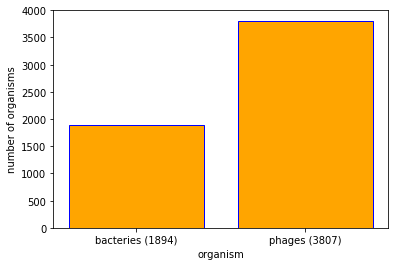

In [4]:
# Display the first graph
fig, axs = plt.subplots()
number_of_bact_and_phage = [len(bacteries_dictionnary), len(phages_dictionnary)]
name = ['bacteries (' + str(number_of_bact_and_phage[0]) + ')', 'phages (' + str(number_of_bact_and_phage[1]) + ')']
axs.set_ylabel('number of organisms')
axs.set_xlabel('organism')
plt.bar(name, number_of_bact_and_phage, width = 0.8, color = 'orange', edgecolor = 'b');

### Création d'un dictionnaire qui contiendra toutes les souches des bactéries

In [5]:
# Dictionnary {strain_name : number of bacteries in this strain}
strain_dictionnary = {}
strain_found = 0
for bacterie in bacteries_dictionnary.keys():
    # Get the strain_id from the bacterie
    strain_id = bacterie.strain
    for strain in strain_dictionnary.keys():
        strain_found = 0
        # Check if there is already the id of the strain in the dictionnary
        if strain_id == strain.id:
            # Increase de number of the bacterie of this strain
            strain_dictionnary[strain] += 1
            strain_found = 1
            break
    
    # If we hadn't found the strain we add it in the dictionnary
    if strain_found != 1 :
        # Add the key-value : strain
        strain_dictionnary[StrainJson.getByID(bacterie.strain)] = 1
        specie_dictionnary = {}

### Création d'un dictionnaire qui contiendra toutes les espèces de bactéries présentes dans les couples

In [6]:
# Dictionnary {specie : number of strain belong to this specie}
specie_dictionnary = {}
specie_found = 0

for strain in strain_dictionnary.keys():
    # Get the specie_id from the strain
    specie_id = strain.specie
    for specie in specie_dictionnary.keys():
        specie_found = 0
        # Check if there is already the specie in the dictionnary
        if specie_id == specie.id:
            # Increase de number of the strain of this specie
            specie_dictionnary[specie] += 1
            specie_found = 1
            break
    # If we hadn't found the specie we add it in the dictionnary
    if specie_found != 1 :
        # Add the key-value : specie
        specie_dictionnary[SpecieJson.getByID(strain.specie)] = 1

### Création d'un dictionnaire qui contiendra tous les genres de bactéries présents dans les couples

In [7]:
# Dictionnary {genus : number of species belong to this genus}
genus_dictionnary = {}
genus_found = 0

for specie in specie_dictionnary.keys():
    # Get the genus id from the specie
    genus_id = specie.genus
    for genus in genus_dictionnary.keys():
        genus_found = 0
        # Check if there is already the genus in the dictionnary
        if genus_id == genus.id:
            # Increase de number of the specie of this genus
            genus_dictionnary[genus] += 1
            genus_found = 1
            break
    # If we hadn't found the genus we add it in the dictionnary
    if genus_found != 1 :
        # Add the key-value : genus
        genus_dictionnary[GenusJson.getByID(specie.genus)] = 1

### Création d'un dictionnaire qui contiendra toutes les familles de bactéries présentes dans les couples

In [8]:

# Dictionnary {family : number of genus in this family}
family_dictionnary = {}
family_found = 0

for genus in genus_dictionnary.keys():
    # Get the family id from the genus
    family_id = genus.family
    for family in family_dictionnary.keys():
        family_found = 0
        # Check if there is already the family in the dictionnary
        if family_id == family.id:
            # Increase de number of the genus belong to this family
            family_dictionnary[family] += 1
            family_found = 1
            break
    # If we hadn't found the family we add it in the dictionnary
    if family_found != 1 :
        # Add the key-value : family
        family_dictionnary[FamilyJson.getByID(genus.family)] = 1


### Répartition des espèces, des genres et des familles

In [9]:
# Species repartition chart
number_of_species_tab = []
species_name = []
for specie, number_of_species in specie_dictionnary.items():
    # Take only specie with more than one souche
    if number_of_species > 1:
        number_of_species_tab.append(number_of_species)
        species_name.append(specie.designation)
                
# Genus repartition chart
number_of_genus_tab = []
genus_name = []
for genus, number_of_genus in genus_dictionnary.items():
    # Take only specie with more than one souche
    if number_of_genus > 1:
        number_of_genus_tab.append(number_of_genus)
        genus_name.append(genus.designation)

# Family repartition chart
number_of_family_tab = []
family_name = []
for family, number_of_family in family_dictionnary.items():
    # Take only specie with more than one souche
    if number_of_family > 1:
        number_of_family_tab.append(number_of_family)
        family_name.append(family.designation)

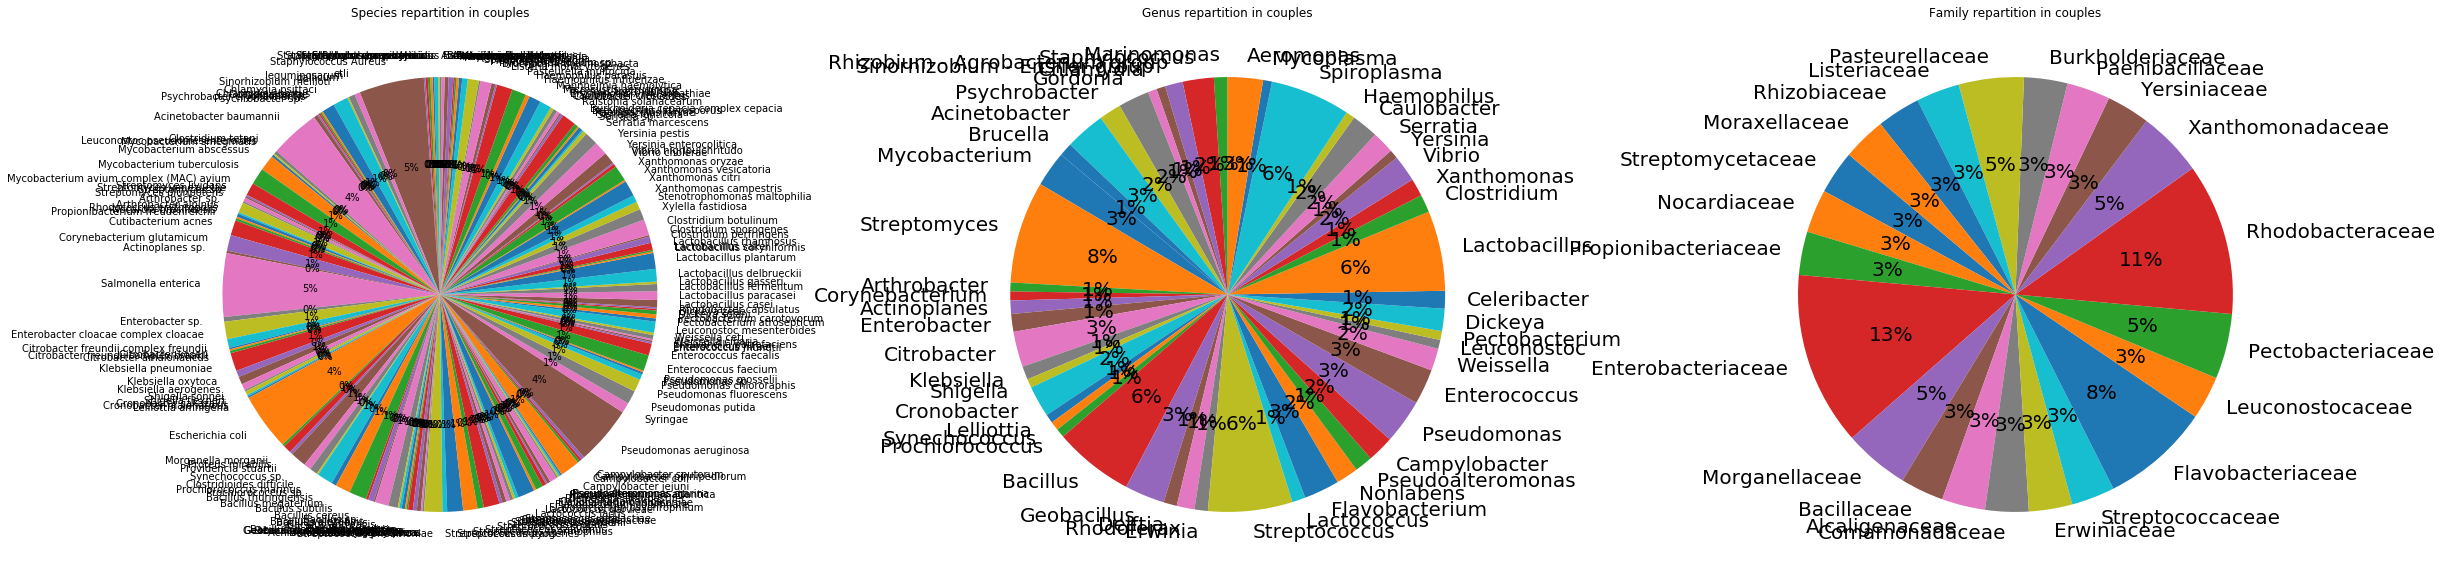

In [11]:
# Display the plot
fig, axs = plt.subplots(1,3, figsize=(40, 10))
axs[0].set_title('Species repartition in couples')
axs[0].pie(number_of_species_tab, labels=species_name, autopct='%1.0f%%', startangle=140, textprops={'size': 10});
axs[1].set_title('Genus repartition in couples');
axs[1].pie(number_of_genus_tab, labels=genus_name, autopct='%1.0f%%', startangle=140, textprops={'size': 20});
axs[2].set_title('Family repartition in couples');
axs[2].pie(number_of_family_tab, labels=family_name, autopct='%1.0f%%', startangle=140, textprops={'size': 20});

### Graphiques concernant la provenance des informations sur les bactéries (Source Data)

In [12]:
source_data_list = functions.getAllOfSourceData()
source_data_dictionnary = {}

for source_data in source_data_list:
    source_data_dictionnary[source_data] = 0
        
for bacterie in bacteries_dictionnary.keys():
    # Get the source data id from the bacterie
    source_data_id = bacterie.source_data
    for source_data in source_data_dictionnary.keys():
        if source_data_id == source_data.id:
            # Increase de number of the bacteries managed by this source_data id
            source_data_dictionnary[source_data] += 1
                        
# For the charts
number_of_bacterie_tab1 = []
source_data_name_tab1 = []
for source_data, number_of_bacterie in source_data_dictionnary.items():
    # Take only source data with more than one bacterie
    if number_of_bacterie > 0:
        number_of_bacterie_tab1.append(number_of_bacterie)
        source_data_name_tab1.append(source_data.designation)

for source_data in source_data_list:
    source_data_dictionnary[source_data]= 0

for couple in list_of_couples:
    # Get the strain designation from the bacterie
    source_data_id = couple.source_data
    for source_data in source_data_dictionnary.keys():
        source_data_found = 0
        if source_data_id == source_data.id:
            #increase de number of the couple managed by this source_data id
            source_data_dictionnary[source_data] += 1  
                            
#For the charts
number_of_bacterie_tab2 = []
source_data_name_tab2 = []
for source_data, number_of_bacterie in source_data_dictionnary.items():
    # Take only specie with more than one bacterie
    if number_of_bacterie > 0:
        number_of_bacterie_tab2.append(number_of_bacterie)
        source_data_name_tab2.append(source_data.designation)

# Dictionnary : public couples (couples where source_data = constants.NCBI_ID or constants.PHAGES_DB_ID)
public_couples = []

# Add the public couple in the list
for couple in list_of_couples:
    if couple.source_data == constants.NCBI_ID or couple.source_data == constants.PHAGES_DB_ID:
        public_couples.append(couple) 

taxonomie_dictionnary = {constants.STRAIN_ID: 0, 
                         constants.SPECIES_ID: 0, 
                         constants.GENUS_ID: 0, 
                         constants.FAMILY_ID: 0}

# Taxonomie repartition
for couple in public_couples:
    taxonomie_dictionnary[couple.level] += 1
        
# For the charts
number_of_bacterie_tab3 = []
taxonomie_name = ['Strain', 'Specie', 'Genus', 'Family']
for taxonomie, number_of_bacterie in taxonomie_dictionnary.items():
    # Take only specie with more than one bacterie
    number_of_bacterie_tab3.append(number_of_bacterie)

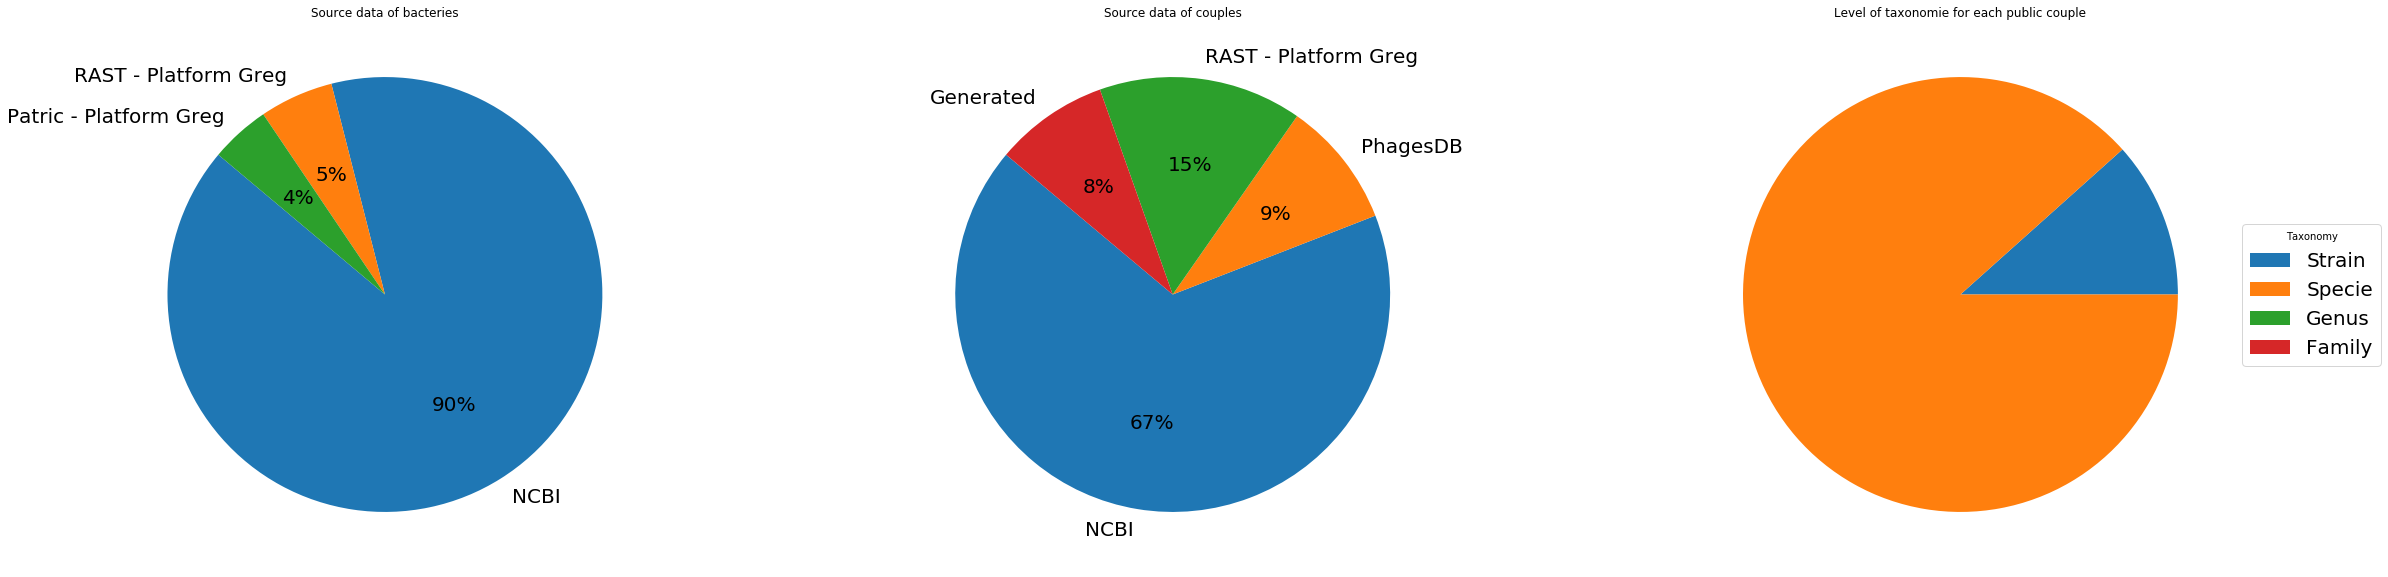

In [13]:
        
# Display graphics
fig, axs = plt.subplots(1,3, figsize=(40, 10))
axs[0].set_title('Source data of bacteries');
axs[0].pie(number_of_bacterie_tab1, labels=source_data_name_tab1, autopct='%1.0f%%', startangle=140, textprops={'size': 20})
axs[1].set_title('Source data of couples');
axs[1].pie(number_of_bacterie_tab2, labels=source_data_name_tab2, autopct='%1.0f%%', startangle=140, textprops={'size': 20})
axs[2].set_title('Level of taxonomie for each public couple');
wedges, autotexts = axs[2].pie(number_of_bacterie_tab3, textprops=dict(color="w"));
axs[2].legend(wedges, taxonomie_name,
              title='Taxonomy', loc='center left',
              bbox_to_anchor=(1, 0, 0.5, 1), prop={'size': 20});

### Graphiques sur la répartition des couples selon leur validité, lysis et types d'interactions

In [14]:
# Dictionnary declaration
validity_of_couple_dictionnary = {constants.LABORATORY_TESTED: 0, 
                                  constants.VALIDE_IN_THE_MIDDLE: 0, 
                                  constants.NO_VALID: 0, 
                                  constants.NOT_VALIDATE: 0}

lysis_dictionnary = {constants.CLEAR_LYSIS: 0, 
                     constants.SEMI_CLEAR_LYSIS: 0,
                     constants.OPAQUE_LYSIS:0,
                     constants.CLEAR_LYSIS_1E7PLUS:0, 
                     constants.CLEAR_LYSIS_1E7MINUS:0,
                     constants.SEMI_CLEAR_LYSIS_1E7PLUS:0,
                     constants.SEMI_CLEAR_LYSIS_1E7MINUS:0}

interaction_type_dictionnary = {constants.POSITIVE_INTERACTION: 0,
                                constants.NEGATIVE_INTERACTION: 0}

for couple in list_of_couples:
    if couple.lysis in lysis_dictionnary.keys():
        lysis_dictionnary[couple.lysis] += 1
    if couple.validity in validity_of_couple_dictionnary.keys():
        validity_of_couple_dictionnary[couple.validity] += 1
    if couple.interaction_type in interaction_type_dictionnary.keys():
        interaction_type_dictionnary[couple.interaction_type] += 1

validity_name = ['laboratory tested', 'valide in the middle', 'no valid', 'not validate']
lysis_name = ['CL', 'SCL', 'OL', 'CL>1E7', 'CL<1E7', 'SCL>1E7', 'SCL<1E7']
interaction_type_name = ['positive', 'negative']
validity_value = [0] * len(validity_name)
lysis_value = [0] * len(lysis_name)
interaction_value = [0] * len(interaction_type_name)

i = 0
for value in validity_of_couple_dictionnary.values():
    validity_value[i] = value
    i += 1
    
i = 0
for value in lysis_dictionnary.values():
    lysis_value[i] = value
    i += 1
    
i = 0
for value in interaction_type_dictionnary.values():
    interaction_value[i] = value
    i += 1


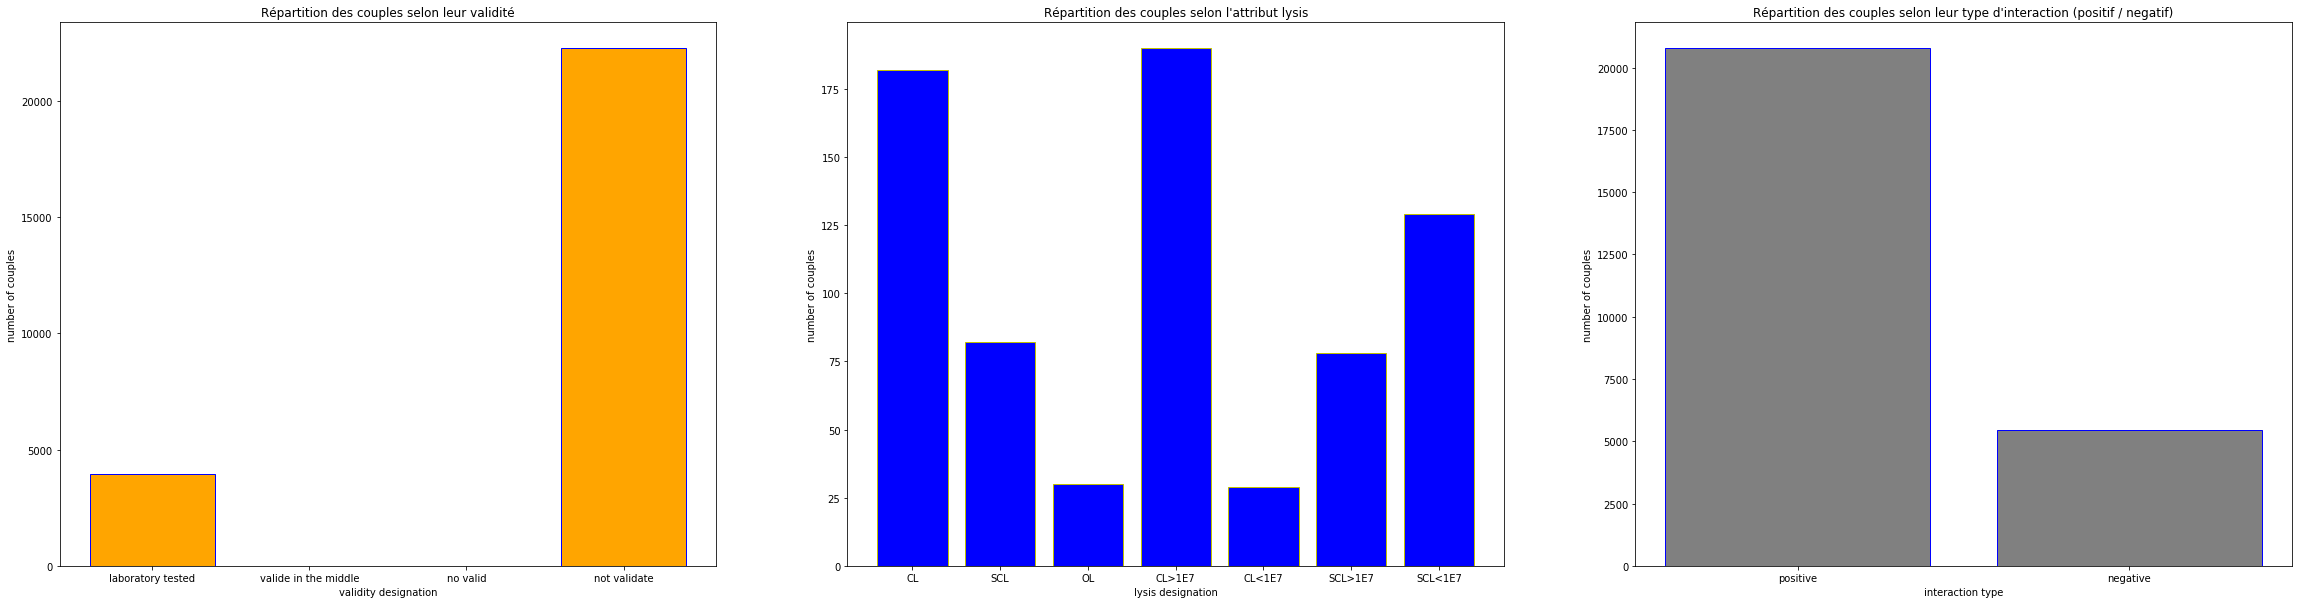

In [18]:
# Display graphic
fig, axs = plt.subplots(1,3, figsize=(40,10))
axs[0].set_title('Répartition des couples selon leur validité');
axs[0].set_ylabel('number of couples');
axs[0].set_xlabel('validity designation');
axs[0].bar(validity_name,validity_value, width = 0.8, color = 'orange', edgecolor = 'b');
axs[1].set_title('Répartition des couples selon l\'attribut lysis');
axs[1].set_ylabel('number of couples');
axs[1].set_xlabel('lysis designation');
axs[1].bar(lysis_name, lysis_value, width = 0.8, color = 'b', edgecolor = 'y');
axs[2].set_title('Répartition des couples selon leur type d\'interaction (positif / negatif)')
axs[2].set_ylabel('number of couples')
axs[2].set_xlabel('interaction type')
axs[2].bar(interaction_type_name, interaction_value, width = 0.8, color = 'gray', edgecolor = 'b');